# Data Exploration

Now that we have cleansed data, let's analyse it. We can start by checking the characters who speak the most in each season.

In [1]:
# import necessary libraries and files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pywaffle import Waffle
import seaborn as sns

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# read in the data
new_df = pd.read_csv('processed_data.csv')

### Characters by Season

In [3]:
# group TV series by seasons and character's name 
char_val_count = new_df["character_name"].value_counts()
grouped_df = new_df.groupby("season_number")["character_name"].value_counts().unstack()

# filter the grouped dataframe  
filtered_grouped_df = grouped_df[grouped_df > 50]

In [4]:
# create a grouped bar chart
my_df = filtered_grouped_df.dropna(axis=1, how='all').T
my_df = my_df.fillna(0)
my_df["sum"] = my_df[1] + my_df[2] + my_df[3]
my_df = my_df.sort_values(by="sum", ascending=False)
my_df = my_df.drop(columns="sum")

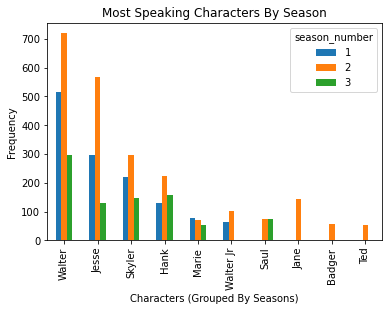

In [5]:
# plot the filtered grouped bar chart 
my_df.plot.bar()
plt.title('Most Speaking Characters By Season')
plt.xlabel('Characters (Grouped By Seasons)')
plt.ylabel('Frequency')
plt.show()

It turns out that the characters who speak the most are Walter and Jesse, followed by Skyler and Hank. In season 1, Walter and Jesse speak more often compared to Skyler and Hank. In season 2, Jesse speaks almost as much as Skyler and Hank. In season 3, Jesse actually speaks slightly less than Skyler and Hank. As for Walter, he speaks less in season 3 compared to season 1 and 2. Let's also plot a pie chart to explore the proportion of each character speaking in the TV series.

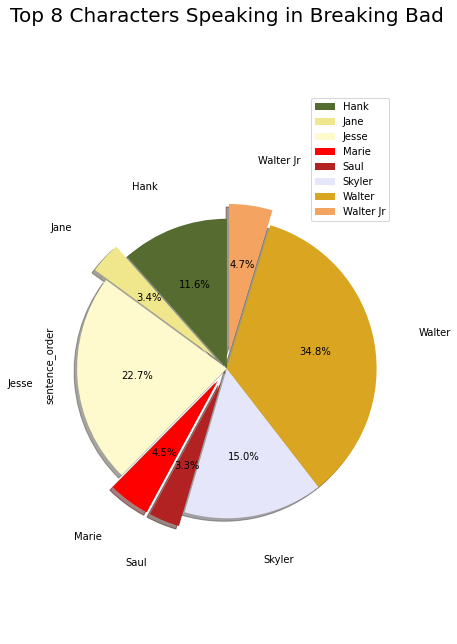

In [49]:
# create a pie chart of most speaking characters 
char_df = new_df.groupby('character_name')["sentence_order"].count()
top_10_char_df = char_df[char_df > 100]
colors = ['darkolivegreen', 'khaki', 'lemonchiffon', 'red', 'firebrick', 'lavender', 'goldenrod', 'sandybrown']
explode = [0, 0.1, 0, 0.1, 0.1, 0, 0, 0.1]

top_10_char_df.plot(kind='pie',
             figsize=(6,10),
             autopct='%1.1f%%',
             pctdistance=0.6,
             shadow=True,
             labeldistance=1.3,
             startangle=90,
             radius=1,
             counterclock=True,
             colors=colors,
             explode=explode)

plt.title('Top 8 Characters Speaking in Breaking Bad', y=1.12, fontsize=20) 
plt.axis('equal') 

plt.legend(labels=top_10_char_df.index, loc='upper right') 

plt.show()

As expected, the most speaking characters are Walter and Jesse, followed by Skyler and Hank. We can also plot multiple pie charts to look at the proportion of characters speaking in each season.

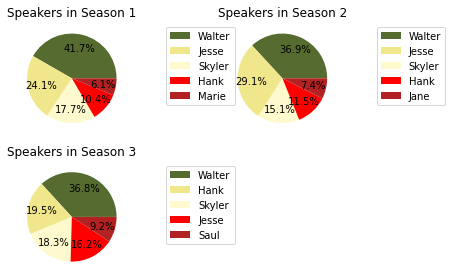

In [58]:
# display top speakers per season
fig = plt.figure()

for season in range(1,4):
    season_df = new_df[new_df['season_number']==season]
    top_5_char_season_df = season_df.groupby('character_name', axis=0)['character_sentence'].count()
    top_5_char_season_df = top_5_char_season_df.sort_values(ascending=False, axis=0).head(5)
    
    axs1 = fig.add_subplot(2, 2, season)
    axs1.pie(top_5_char_season_df, 
             colors = ['darkolivegreen', 'khaki', 'lemonchiffon', 'red', 'firebrick', 'lavender', 'goldenrod', 'sandybrown'],
             autopct='%1.1f%%',
            pctdistance=0.7
            )
    axs1.set_aspect('equal')  
    axs1.set_title(f'Speakers in Season {season}')
    axs1.legend(labels=top_5_char_season_df.index, loc='best', bbox_to_anchor=(1, 1, 1, 0)) 

plt.tight_layout()

It seems like Walter and Jesse are the most speaking characters only in the first two seasons. As for season 3, Hank is the second most speaking character. However, let's remember that we didn't manage to extract all the transcripts from season 3. This means that this analysis is limited.

### Visualizing the Data: Word Clouds

Now that we've made some analysis, let's create a couple of word clouds. This will help us see which word is spoken the most, drawing some interesting insights in each character's set of vocabulary.

In [6]:
# import necessary libraries
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

stopwords = set(STOPWORDS)

In [7]:
# select sentences
sentences = new_df['character_sentence']

# instantiate word cloud object
heisenberg_wc = WordCloud()

# remove stop words 
list_of_stopwords = ['know', 'got', 'okay', 'right', 'mean', 'yeah', 'man', 'good', 'now', 'one', 'want', 'come', 'think', 'go', 'man', 'well', 'look', 'see', 'say', 'need', 'going', 'tell', 'back', 'really', 'gonna', 'thing', 'guy', 'us', 'will',
'give', 'even','talking','Hey','time','maybe','Oh','talk','sorry' ,'way', 'God','gotta','Please','said','huh','let','something','Thank' ,'two','much','take','make','Yes','call','nothing', 'feel','thought', 'kind','listen','house','better','never', 'little']

for stopword in list_of_stopwords:
    heisenberg_wc.stopwords.add(stopword)

# generate word cloud
heisenberg_wc.generate(" ".join(sentences.values))

In [8]:
# create a 'Breaking Bad' binary mask 
im_frame = np.array(Image.open('breakingbad_mask.png'))
im_frame = im_frame[:, :, 0]

# make the mask binary (split it into black and white)
im_frame[im_frame < 128] = 0
im_frame[im_frame >= 128] = 255

# make a copy of the image 
im_frame_cp = im_frame.copy()

# turn white pixels into black and vice versa  
im_frame_cp[im_frame == 255] = 0
im_frame_cp[im_frame == 0] = 255
im_frame_cp

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

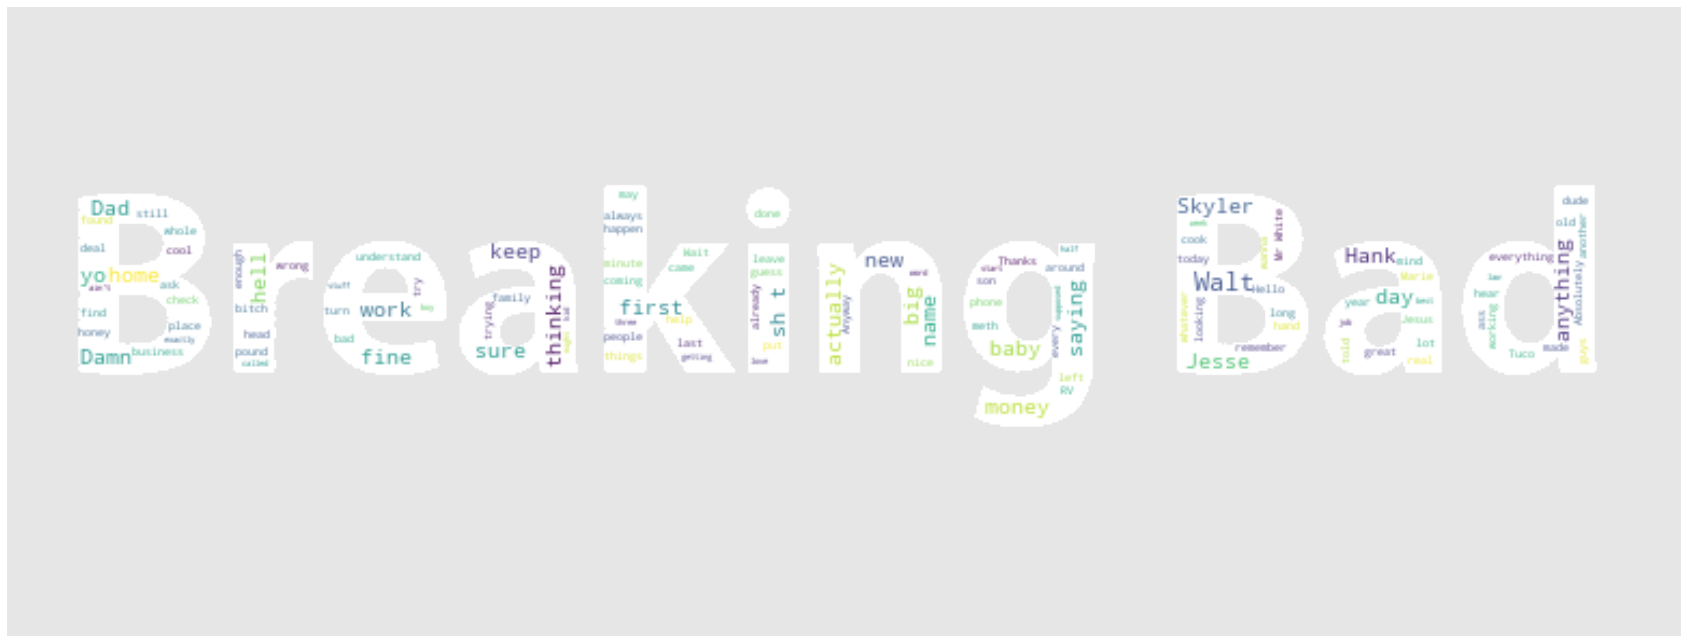

In [9]:
# instantiate a word cloud object
heisenberg_wc = WordCloud(background_color='white', max_words=3000, mask=im_frame_cp)

# generate the word cloud
heisenberg_wc.generate(" ".join(sentences.values))

# display the word cloud
fig = plt.figure(figsize=(30, 30))
plt.imshow(heisenberg_wc, interpolation='bilinear')
plt.imshow(im_frame, alpha=0.1, cmap='gray')
plt.axis('off')
plt.show()

Here's our first word cloud! It seems like some of the most spoken words are: 'Walt', 'money', 'yo', and 'hell'. This makes sense since Walt is the main character and money is the main topic of the TV series. Moreover, 'yo' and 'hell' are the most common words pronounced by Jesse, the other main character.

It was challenging and subjective to choose which stop words to remove. For instance, we deliberately chose to keep the word 'yo'. Even if it just a greeting, it still represents a unique trait of Jesse, one of the main characters of the show. We also chose to keep the swearing words such as 'sit', 'damn', and 'b*tch'. This is because they clearly express the sentiment of the characters.

Now that we've created a general word cloud, let's try to create a word cloud for each character with the shape of.. the character! Let's go ahead and do that for the top speaking characters.

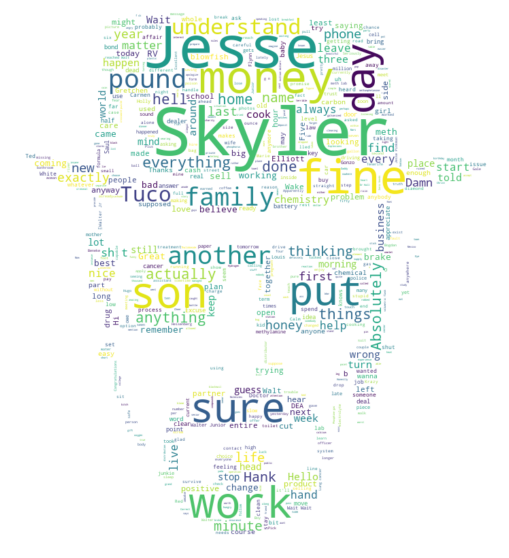

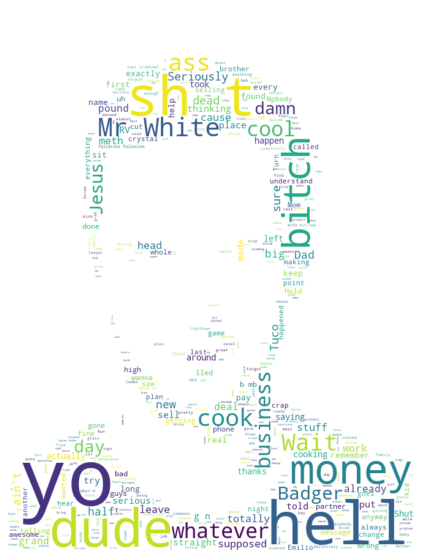

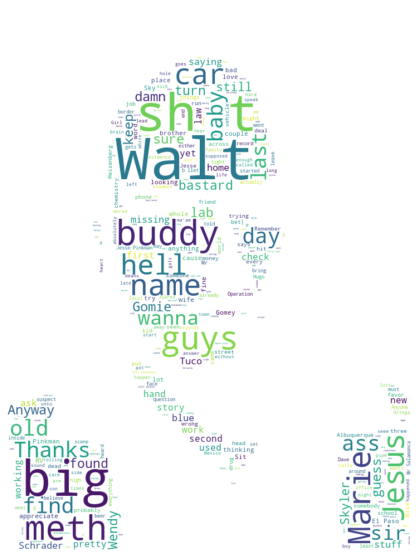

In [22]:
# create word clouds for top 3 characters
list_of_char_names = ['Walter', 'Jesse', 'Hank']
list_of_stopwords = ['know', 'got', 'okay', 'right', 'mean', 'yeah', 'man', 'good', 'now', 'one', 'want', 'come', 'think', 'go', 'man', 'well', 'look', 'see', 'say', 'need', 'going', 'tell', 'back', 'really', 'gonna', 'thing', 'guy', 'us', 'will',
'give', 'even','talking','Hey','time','maybe','Oh','talk','sorry' ,'way', 'God','gotta','Please','said','huh','let','something','Thank' ,'two','much','take','make','Yes','call','nothing', 'feel','thought', 'kind','listen','house','better','never', 'little']

max_size = 500
# iterate through characters 
for char in list_of_char_names:
        
    # filter df by character and their sentences 
    char_df = new_df.loc[new_df['character_name'] == char]
    char_sentences = char_df['character_sentence']
    # generate word cloud 
    char_wc = WordCloud()
    char_wc.generate(" ".join(char_sentences.values))
    
    # generate image frame 
    im_frame = np.array(Image.open(f'{char}_mask.jpg'))
    ratio_to_divide = int(max(im_frame.shape) / max_size)
    im_frame = im_frame[::ratio_to_divide, ::ratio_to_divide, :]
    
    im_frame = im_frame[:, :, 0]
    im_frame[im_frame > 128] = 255
    im_frame[im_frame <= 128] = 0
    
    if (im_frame == 0).sum() > (im_frame == 255).sum():
        im_frame_cp = im_frame.copy()
        im_frame_cp[im_frame == 255] = 0
        im_frame_cp[im_frame == 0] = 255
        
        im_frame = im_frame_cp
        
    # generate word cloud with mask 
    char_wc = WordCloud(background_color='white', max_words=2000, mask=im_frame)
    char_wc.generate(" ".join(char_sentences.values))
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(char_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Look at that! We just created a word cloud for Walter, Jesse, and Hank! With their most common spoken words! No doubt Walt says 'Syler' quite often, since she's his wife. And we're not surprised to see 'yo' as Jesse's main word, since this is how he usually starts any conversation. Last but not least, Hank's most common word is 'Walt'. This makes sense since it's Walt whom he interacts most often with. We tried to plot a silhouette word cloud for Skyler too. However, we couldn't manage to find an image on the web which was easy to turn into black and white. This made it difficult for us to identify the words in the silhouette, so we chose to delete it for now. 

Now let's dig deeper into our data and try to answer more specific research questions.

### Additional Research Questions

Here's a list of research questions we came up with for this project:

1) Who are the top 3 characters who speak the longest sentences? And the shortest? 
2) What's the season with the highest number of sentences? 
3) Is there a relationship between number of sentences and their number of words?
4) What are the main clusters among the characters? And what are characters' nearest neighbours?
5) What's the most common interaction between/among characters throughout the whole series? 

We'll answer them one by one.

### 1) Longest/ Shortest Sentences

- Question: Who are the top 3 characters who speak the longest sentences? And the shortest?
- Answer: Longest are Hank, Walter, and Skyler. Shortest are Everyone, Skyler, and Walter.

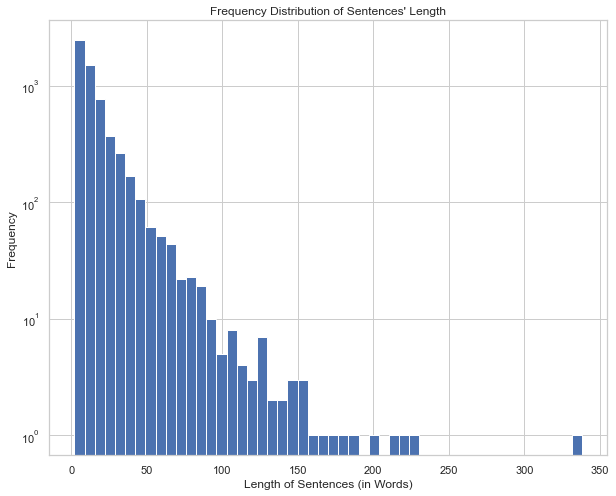

In [65]:
# plot histogram of sentences lengths
new_df['sentence_length'].plot(kind='hist', figsize=(10,8), bins=50)

# plot log scale due to numerous orders of magnitude of the data 
plt.title('Frequency Distribution of Sentences\' Length')
plt.xlabel('Length of Sentences (in Words)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

As shown in the graph above, the majority of the sentences are pretty short. Whereas only a few of them are quite long. This makes sense since in the TV Series is quite dynamic. So there are lots of interactions among characters, and not that many monologues. Now that we know this information, we can go ahead and look at the top 5 longest sentences.

In [81]:
# extract top 5 longest sentences
new_df.sort_values(by="sentence_length", ascending=False).head(10)

,episode_title,episode_number,season_number,character_name,character_sentence,sentence_order,sentence_length
1853,Grilled,2,2,Hank,"All right, everybody. Listen up. Tuco Salaman...",1,338
4655,No Mas,1,3,Walter,"I guess what I would…sorry, sorry. I guess wh...",71,226
4587,ABQ,13,2,Skyler,I know. I know you're not. Because I asked he...,212,222
2820,Peekaboo,6,2,Walter,"Monoalkenes, diolefins, trienes, polyenes. Th...",41,217
725,Cancer Man,4,1,Walter,"Actually, your mother wasn't a waitress. It w...",32,197
5508,Mas,5,3,Skyler,I just don't know what the hell I'm doing any...,170,185
5880,One Minute,7,3,Dealer,So you the gentlemen? Lucky you boys caught m...,87,177
704,Cancer Man,4,1,Hank,"Could be. Turns out he's missing, too. Normal...",9,173
789,Cancer Man,4,1,Ken,Come on! Am I gonna have to come down there a...,102,164
3781,Over,10,2,Skyler,I know one party can't begin to repay all you...,31,160


At the top of the 5 longest sentences, there's Hank's speech at the DEA office. He gave a speech to his colleagues to arrest a drug dealer named Tuco Salamanca. As for the second, this is a speech that Walter gives at his own high school. Skyler was trying to make a point during an argument with Walter in the third longest sentence. Then, sentence 4 is Walter giving a chemistry lesson at school. Last but not least, sentence number 5 is Walter telling the story of how he met Skyler to his son, Walter Junior.

It makes sense that long sentences appear very rarely. They represent unique, uninterrupted speeches or descriptions of events. These sentence also all come from the main characters: Hank, Walter, and Skyler. They in fact are central to the whole plot of the TV series. Let's now look into the shortest sentences and see if we can find some interesting insights.

In [30]:
# extract top 5 shortest sentences
new_df.sort_values(by="sentence_length", ascending=False).tail()

,episode_title,episode_number,season_number,character_name,character_sentence,sentence_order,sentence_length
1854,Grilled,2,2,Everyone,Yeah!,2,2
4546,ABQ,13,2,Skyler,Okay.,167,2
1856,Grilled,2,2,Everyone,Yeah!,4,2
1858,Grilled,2,2,Everyone,Yeah!,6,2
1167,Crazy Handful of Nothin',6,1,Walter,3a.,51,2


As shown above, the shortest sentences are mainly exclamations single-word lines. Except for the last one, '3a', where Walter says the stage of his cancer while he's in the hospital. 
It'd be interesting to now explore the length of the top sentences by season. Let's go ahead and do that. 

In [78]:
# group TV series by seasons 
grouped_df = new_df.groupby('season_number')

# select top 5 longest sentences for each season 
top_5_sen_by_season = grouped_df['sentence_length'].nlargest(5, keep='first').index.values
indices_of_long_sen = [] 

for value in top_5_sen_by_season:
    indices_of_long_sen.append(value[1])

Text(0.5, 0.98, 'Top Longest Sentences by Season and Character')

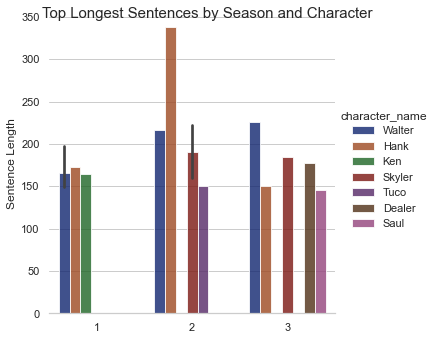

In [80]:
# plot longest sentences of characters by season
sns.set_theme(style="whitegrid")

# Draw a nested barplot by seasons and characters
g = sns.catplot(
    data=new_df.loc[indices_of_long_sen], kind="bar",
    x="season_number", y="sentence_length", hue="character_name",
    palette="dark", alpha=.8, height=5
)
g.despine(left=True)
g.set_axis_labels("", "Sentence Length")
g.fig.suptitle("Top Longest Sentences by Season and Character",
                  fontsize=15, fontdict={"weight": "bold"})

The top 5 longest sentences and their correspondent characters for each season. Hank's sentence in season 2 is significantly longer compared to all other sentences. Moreover, we see less bars in seasons 1 and 2 because more than one sentence come from the same character. The black line on top of the bars indicates the standard deviation

### 2) Season with Highest Number of Sentences

Let's now try to answer question n.2 with a waffle chart.

- Question: What's the season with the highest number of sentences?
- Answer: 2. 

In [34]:
# create list of sentences by season
list_of_num_of_sentences_by_season = []

for season_number in set(new_df['season_number']):
    num_of_sentences_by_season = len(new_df[new_df['season_number'] == season_number])
    list_of_num_of_sentences_by_season.append(num_of_sentences_by_season)

In [83]:
# calculate proportion of seasons 
total_values = len(new_df)
list_of_season_proportions = [] 

for season in list_of_num_of_sentences_by_season:
    season_proportions = season / total_values
    list_of_season_proportions.append(season_proportions)

In [84]:
width = 40 # width of chart
height = 10 # height of chart

seasons = set(new_df['season_number']) # seasons
values = list_of_num_of_sentences_by_season # correponding values of categories

colormap = plt.cm.coolwarm # color map class

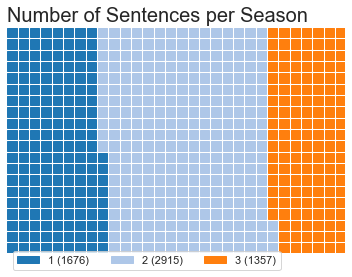

In [85]:
# set up the Waffle chart figure
fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, #pass the number of rows and columns for the waffle 
                 values = values, #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(seasons,values)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3},
                 title={
                        'label': 'Number of Sentences per Season',
                        'loc': 'left',
                        'fontdict': {
                                    'fontsize': 20
                        }
                 }
                )

# display the waffle chart
plt.show()

It seems like season n.2 is the one with the highest number of sentences. This is because, compared to season 1 which has only 7 episodes, season 2 has 13 episodes. We couldn't extract all the transcripts of season 3 due to the character names' missing. Hence why it looks like season 3 is shorter than season 2.

### 3) Sentences vs Words Relationship

- Question: Is there a relationship between number of sentences of a character and number of words in the sentences of that character? 
- Answer: Yes, there's a linear correlation between the longest sentence and the number of sentences.

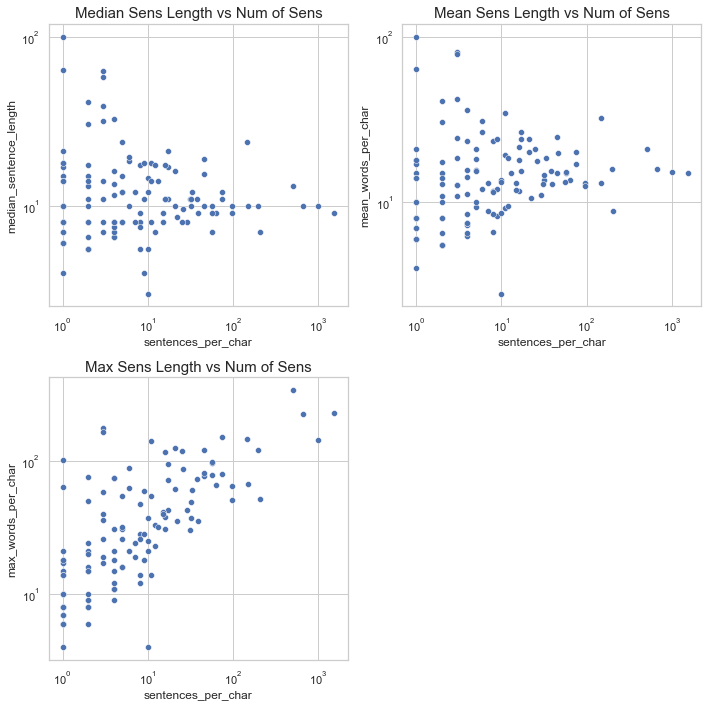

In [39]:
# set up the scatter plots figure
fig = plt.figure(figsize=(10,10))

# Display top speakers by season
num_sens_per_char = new_df.groupby("character_name").size()
median_words_per_char = new_df.groupby("character_name")["sentence_length"].median()
mean_words_per_char = new_df.groupby("character_name")["sentence_length"].mean()
max_words_per_char = new_df.groupby("character_name")["sentence_length"].max()
    
df = pd.concat([num_sens_per_char, median_words_per_char], axis=1).rename(
    columns={
        0: "sentences_per_char",
        "sentence_length": "median_sentence_length"
    }
)
sns.scatterplot(x='sentences_per_char', y='median_sentence_length', data=df, ax=fig.add_subplot(2, 2, 1))
plt.yscale('log')
plt.xscale('log')
plt.title(f'Median Sens Length vs Num of Sens', size=15)

df = pd.concat([num_sens_per_char, mean_words_per_char], axis=1).rename(
    columns={
        0: "sentences_per_char",
        "sentence_length": "mean_words_per_char"
    }
)

sns.scatterplot(x='sentences_per_char', y='mean_words_per_char', data=df, ax=fig.add_subplot(2, 2, 2))
plt.yscale('log')
plt.xscale('log')
plt.title(f'Mean Sens Length vs Num of Sens', size=15)

df = pd.concat([num_sens_per_char, max_words_per_char], axis=1).rename(
    columns={
        0: "sentences_per_char",
        "sentence_length": "max_words_per_char"
    }
)

sns.scatterplot(x='sentences_per_char', y='max_words_per_char', data=df, ax=fig.add_subplot(2, 2, 3))
plt.yscale('log')
plt.xscale('log')
plt.title(f'Max Sens Length vs Num of Sens', size=15)
plt.tight_layout()
plt.show()

There's no linear correlation between the median sentence length and their number. This is per character. We can say the same about the mean.  Yet, there's a linear correlation between longest sentences and the number of sentences. This means that the more sentences a character says, the longer their largest sentence is. This is because main characters often speak profound and deep sentences. The less sentences a character speaks, the shorter their greatest sentences are. This is because background actors have less important parts in the TV series. So, they have less chances to speak longer sentences compared to main characters.